# Laboratory methods: experiments, measurements and uncertainties
## Experiment no. 3 - Measure diffusion coefficient of a tracer

**Your name(s):**

**Date:**

---
## 1) Objective - Describe the objective of this experiment in your own words (max 150 words).

## 2) Experimental Setup (max 200 words)

## 3) Procedure - Briefly describe the procedure used to collect the data (max 200 words).

## 4) Data collection and storage
Enter the measurements done: 1) diameter of spheres, 2) mass of spheres, 3) volume of fluid, 4) masss of fluid, 5) sedimentation time, 6) sedimentation distance

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tifffile as tiff
from PIL import Image

bit = 8
level = 2**bit - 1

# Load image
im_W = Image.open("data_3/W.png")
im_MB = Image.open("data_3/MB.png")
im_Q01 = Image.open("data_3/Q01.png")
im_Q05 = Image.open("data_3/Q05.png")
im_Q10 = Image.open("data_3/Q10.png")
im_Q15 = Image.open("data_3/Q15.png")
im_Q20 = Image.open("data_3/Q20.png")

# Convert to double precision (float64)
im_W = np.array(im_W)/level
im_MB = np.array(im_MB)/level
im_Q01 = np.array(im_Q01)/level
im_Q05 = np.array(im_Q05)/level
im_Q10 = np.array(im_Q10)/level
im_Q15 = np.array(im_Q15)/level
im_Q20 = np.array(im_Q20)/level

# full image size
ny, nx = im_W.shape

# Enter pixel size: 3.1 um for XiD (CCD) camera and 5.5 um for XiQ (sCMOS) camera
Px = 0.0055
M = 10
px = Px / M
# Enter cropping area
y_min = 200
y_max = ny - y_min
x_min = 1200
x_max = 1400

print(f"Size of image analysed = {nx:.4g} by {ny:.4g}")
print(f"Size of cropped image = {x_max - x_min:.4g} by {y_max - y_min:.4g}")

# Cropping all images
im_W = im_W[y_min:y_max, x_min:x_max]
im_MB = im_MB[y_min:y_max, x_min:x_max]
im_Q01 = im_Q01[y_min:y_max, x_min:x_max]
im_Q05 = im_Q05[y_min:y_max, x_min:x_max]
im_Q10 = im_Q10[y_min:y_max, x_min:x_max]
im_Q15 = im_Q15[y_min:y_max, x_min:x_max]
im_Q20 = im_Q20[y_min:y_max, x_min:x_max]

c01 = (im_W - im_Q01) / (im_W - im_MB)
c05 = (im_W - im_Q05) / (im_W - im_MB)
c10 = (im_W - im_Q10) / (im_W - im_MB)
c15 = (im_W - im_Q15) / (im_W - im_MB)
c20 = (im_W - im_Q20) / (im_W - im_MB)

# compute transverse (perpendicular to flow!) profiles
P01 = np.mean(c01, axis=1)
P05 = np.mean(c05, axis=1)
P10 = np.mean(c10, axis=1)
P15 = np.mean(c15, axis=1)
P20 = np.mean(c20, axis=1)

#df = pd.DataFrame({"Spehres diameter, [cm]": D, "Sphere density, [cm/s]": rho_s, "Sphere sedimentation, [cm/s]": vs, "fluid density, [g/cm3]": rho_f})
#df

Size of image analysed = 2048 by 2048
Size of cropped image = 200 by 1648


## 5) Show results


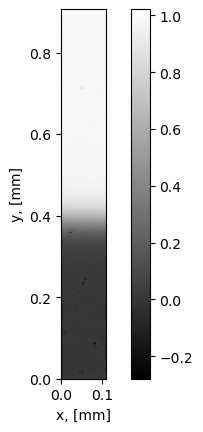

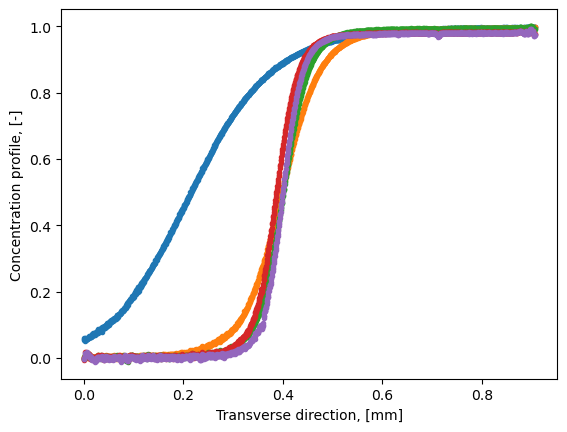

In [47]:
x = np.linspace(0,(x_max-x_min)*px,x_max-x_min)
y = np.linspace(0,(y_max-y_min)*px,y_max-y_min)

plt.figure(1)
plt.imshow(c15,extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower',cmap='gray')
plt.colorbar()
plt.ylabel(r"y, [mm]")
plt.xlabel(r"x, [mm]")
plt.grid(False)
plt.show()

plt.figure(2)
plt.plot(y,P01,'.')
plt.plot(y,P05,'.')
plt.plot(y,P10,'.')
plt.plot(y,P15,'.')
plt.plot(y,P20,'.')
plt.ylabel(r"Concentration profile, [-]")
plt.xlabel(r"Transverse direction, [mm]")
plt.grid(False)
plt.show()

## 6) Data analysis

In [20]:
# compute the concentration transverse (perpendicular to flow) profile




#df = pd.DataFrame({"Measured fluid viscosity, [Pa s]": mu})
#df

# print(f"Fluid viscosity mu = {mu:.4g} Pa s")

## 7) results discussion: comment on the items below
- Does the relationship between the data you collected (Darcy velocity and hydraulic gradient) appear linear?
- The measured value for the Hydraulic conductivity matches the prediction of the KC formula?

---
### IMPORTANT: Before closing the browser
Go to **File → Download → Notebook (.ipynb)** to save your work.
